In [2]:
#download data set
#https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-w
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
wine_data = pd.read_csv("winequality-white.csv",names=["fixed acidity","volatile acidity","citric acid",
                                                       "residual sugar",
                        "chlorides","free sulfur dioxide","total sulfur dioxide","density","pH","sulphates","alcohol",
                                                      "quality"],skiprows=1,sep=r'\s*;\s*',
                       engine='python')

In [16]:
wine_data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


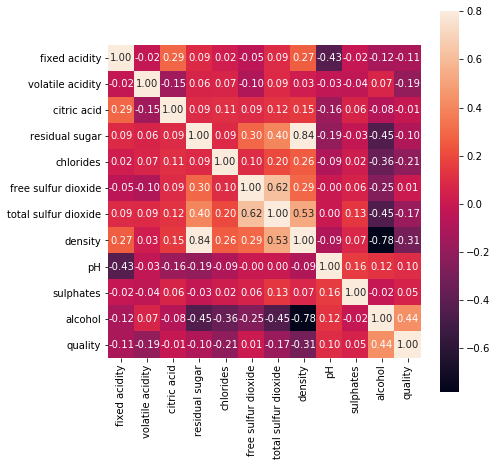

In [17]:
corrmat = wine_data.corr()
f , ax = plt.subplots(figsize=(7,7))
sns.heatmap(corrmat,vmax=.8,square=True,annot=True,fmt='.2f')
plt.show()

In [22]:
X = wine_data.drop('quality',axis=1) 
y = wine_data['quality']

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train , X_test , Y_train ,Y_test = train_test_split(X,y,test_size=0.2,random_state=0)

In [25]:
print(X_train.shape,X_test.shape)

(3918, 11) (980, 11)


In [26]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [27]:
model.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [28]:
score = model.score(X_test,Y_test)
print(score)

0.5724489795918367


In [29]:
model.n_features_

11

In [30]:
model.feature_importances_

array([0.07214366, 0.10144014, 0.07583225, 0.07247295, 0.08706162,
       0.10997349, 0.09504151, 0.07878096, 0.08851946, 0.08398971,
       0.13474424])

In [31]:
#graphivz can be downloaded from 
import sklearn.tree as tree
tree.export_graphviz(model,out_file='tree.dot',feature_names=X.columns)

In [32]:
from subprocess import call

In [ ]:
call(['dot','-T','png','tree.dot','-o','tree.png'])
